# 비지도 학습

학습시 데이ㅏ터만 존재하고 결과가 ㅇ벗는 경우 사용하는 학습 방법

데이터를 탐지해서 데이터의 패턴을 분석해서 목적을 달성하는 학습 방법

군집, 패턴탐색, 이상 발견, 데이터 스케일링, 차원축소 등

### 스케일 조정

데이터들을 원하는 형태로 변형하는 학습

- StandardScaler: 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 갖게 만드는 방법

- RobustScaler: StandardScaler와 비슷하지만 중간값과 사분위값을 사용한다. 이상치에 영향을 받지 않는다.

- MinMaxScaler: 모든특성이 정확하게 0과 1사이에 위치하도록 변환한다.

- Normallizer: 각 데이터간의 거리를 측정해서 유클리디안 
거리를 1로 맞춰지도록 변환된다.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('breast_cancer.csv')
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [28]:
x = df1.drop(['target'], axis=1)
y = df1['target']

X_train, y_train, X_test, y_test = train_test_split(x,y)

### 스케일링을 위한 비지도 학습 모델들


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

s1 = StandardScaler()
s2 = RobustScaler()
s3 = MinMaxScaler()
s4 = Normalizer()

s1.fit(X)
s2.fit(X)
s3.fit(X)
s4.fit(X)

Normalizer(copy=True, norm='l2')

In [46]:
# 학습된 모델을 통해 데이터를 변형한다.

X_train1 = s1.transform(X_train)
X_train2 = s2.transform(X_train)
X_train3 = s3.transform(X_train)
X_train4 = s4.transform(X_train)

In [32]:
X_train1

array([[ 0.6312807 ,  0.93090865,  0.70150892, ...,  1.67787627,
         3.11138732,  0.67575061],
       [ 1.31859505,  0.49807416,  1.27405271, ...,  1.37334433,
         1.25902852,  0.8176151 ],
       [ 0.14561642, -0.94238039,  0.15656258, ...,  0.38209284,
         0.40484036,  0.04345613],
       ...,
       [-0.86547411, -1.06571495, -0.89625894, ..., -1.08940554,
        -1.61576763, -0.59936735],
       [-1.23270447,  0.15134116, -1.22989956, ..., -1.38251753,
        -1.56399865,  0.32884759],
       [ 1.17090767,  0.16064943,  1.13812505, ...,  1.1967158 ,
         0.26247566, -0.01473048]])

In [31]:
X_train2

array([[ 0.73039216,  0.79040853,  0.78672658, ...,  1.29439204,
         2.96592593,  0.78079534],
       [ 1.32352941,  0.46003552,  1.26719668, ...,  1.0870737 ,
         1.26962963,  0.90494665],
       [ 0.31127451, -0.63943162,  0.32941583, ...,  0.41225251,
         0.48740741,  0.22744908],
       ...,
       [-0.56127451, -0.73357016, -0.55409609, ..., -0.58950969,
        -1.36296296, -0.33511154],
       [-0.87818627,  0.19538188, -0.83408227, ..., -0.78905359,
        -1.31555556,  0.4772066 ],
       [ 1.19607843,  0.20248668,  1.15312824, ...,  0.96682907,
         0.35703704,  0.17652764]])

In [33]:
X_train3

array([[0.443419  , 0.45924924, 0.45062539, ..., 0.77250859, 0.64242066,
        0.26957891],
       [0.55795352, 0.39634765, 0.54667957, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.36248758, 0.18701387, 0.35920116, ..., 0.48006873, 0.31263552,
        0.1947396 ],
       ...,
       [0.19399877, 0.16909029, 0.18257204, ..., 0.14797251, 0.06643012,
        0.11865407],
       [0.13280326, 0.34595874, 0.12659802, ..., 0.08182131, 0.07273802,
        0.22851896],
       [0.5333428 , 0.34731146, 0.52387534, ..., 0.66391753, 0.29528878,
        0.18785255]])

In [34]:
X_train4

array([[1.12924536e-02, 1.60857030e-02, 7.52830238e-02, ...,
        1.55262603e-04, 3.33179181e-04, 6.64010083e-05],
       [8.61040307e-03, 9.83063068e-03, 5.63781853e-02, ...,
        9.39483511e-05, 1.68767570e-04, 4.52768665e-05],
       [1.39919482e-02, 1.45653887e-02, 9.15306613e-02, ...,
        1.33516063e-04, 3.01151836e-04, 8.09793561e-05],
       ...,
       [1.99857876e-02, 2.65334780e-02, 1.26642793e-01, ...,
        7.76703985e-05, 3.43077329e-04, 1.31909806e-04],
       [2.03601482e-02, 4.14816956e-02, 1.29209033e-01, ...,
        4.95325562e-05, 4.02335001e-04, 1.86979679e-04],
       [9.48317639e-03, 1.03821295e-02, 6.21472820e-02, ...,
        1.00391763e-04, 1.59161476e-04, 4.34823123e-05]])

In [47]:
from sklearn.svm import SVC

model1 = SVC()
model2 = SVC()
model3 = SVC()
model4 = SVC()
model5 = SVC()

model1.fit(X_train, y_train)
model2.fit(X_train1, y_train)
model3.fit(X_train2, y_train)
model4.fit(X_train3, y_train)
model5.fit(X_train4, y_train)

ValueError: bad input shape (143, 30)

In [39]:
X_test1 = s1.transform(X_test)
X_test2 = s2.transform(X_test)
X_test3 = s3.transform(X_test)
X_test4 = s4.transform(X_test)

ValueError: could not convert string to float: 'malignant'

In [40]:
r1 = model1.score(X_test, y_test)
r2 = model2.score(X_test1, y_test)
r3 = model3.score(X_test2, y_test)
r4 = model4.score(X_test3, y_test)
r5 = model5.score(X_test4, y_test)

print(r1)
print(r2)
print(r3)
print(r4)
print(r5)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### PCA(차원축소)

다수의 특성을 가진 데이터의 특성을 줄이는 비지도학습

데이터 시각화나 데이터의 특성을 추출하는 용도로 사용한다

In [18]:
import pandas as pd
import seaborn as sns

In [41]:
df1 = pd.read_csv('breast_cancer.csv')

# sns.pairplot(df1, hue = 'target', size = 3)

In [42]:
# PCA를 수행하기 전에 스케일링을 한다.

s10= StandardScaler()
X = df1.drop(['target'], axis= 1)
y = df1['target']

s10.fit(X)
X_scale = s10. transform(X)

In [43]:
from sklearn.decomposition import PCA

# 특성을 몇개로 줄인 것인가
pca = PCA(n_components=2)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)
print(f'축소 전 : {X_scale.shape}')
print(f'축소 후 : {X_pca.shape}')


축소 전 : (569, 30)
축소 후 : (569, 2)


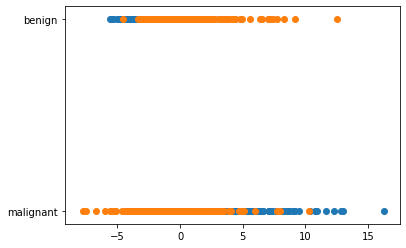

In [48]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], y)
plt.scatter(X_pca[:, 1], y)

### 특성 추출 (사람 얼굴에서 특성을 추출한다)


In [50]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [52]:
# 첫번째 이미지의 크기
people.images[0].shape

(87, 65)

In [53]:
# 전체 이미지의 개수
len(people.target)

3023

In [54]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [55]:
len(people.target_names)

62

사용할 이미지는 총 62명의 3023장 이미지이며 사이즈는 87 X 65이다.

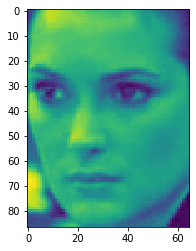

In [60]:
import matplotlib.pyplot as plt

plt.imshow(people.images[0])

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(people.images, people.target)

model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(X_train, y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.